# <font color = "474973"> Matplotlib Basic Customization </font>

This notebook is designed with the realistic data set to give a better understandng of how the basic customization offered by the library impact the visualization. Object oriented plotting approach is used in this notebook. The codes are updated in the sequential order so it is easy to follow along. <br><br>
<b>Pyplot</b> is a Matplotlib module that provides a <b>MATLAB</b>-like interface. Pyplot provides functions that interact with the figure i.e. creates a figure, decorates the plot with labels, and creates a plotting area in a figure

## <font color = "364652"> Importing the required libraries </font>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## <font color = "364652"> Importing the data set </font>

In [ ]:
hotels = pd.read_excel("HotelCustomersDataset.xlsx")

hotels["date"] =  (pd.to_datetime("2018-12-31")
                   - pd.to_timedelta(hotels["DaysSinceCreation"], unit="D")).astype("datetime64[ns]")

In [ ]:
hotels.head()

,ID,Nationality,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,...,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom,date
0,1,PRT,51.0,150,45,371.0,105.3,1,0,3,...,0,0,0,0,0,0,0,0,0,2018-08-03
1,2,PRT,NaN,1095,61,280.0,53.0,0,0,1,...,0,0,0,0,0,0,0,0,0,2016-01-01
2,3,DEU,31.0,1095,0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,2016-01-01
3,4,FRA,60.0,1095,93,240.0,60.0,0,0,1,...,0,0,0,0,0,0,0,0,0,2016-01-01
4,5,FRA,51.0,1095,0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,2016-01-01


## <font color = "364652"> Plot for the monthly sum of LodgingRevenue and OtherRevenue. </font>

For illustrating the basic customizations that we can do with matplotlib, in this notebook we will be plotting the monthly Lodging Revenue & Other Revenue. So We will be creating a smaller dataset from the data above consisting of the required two columns.<br><br>
We will start with the default chart created by matplotlib and would customize it. 

In [ ]:
daily_revenue = hotels.groupby("date").agg({"LodgingRevenue":"sum", "OtherRevenue":"sum"})
monthly_revenue = daily_revenue.resample("M").sum()

In [ ]:
monthly_revenue.head()

,LodgingRevenue,OtherRevenue
date,,
2016-01-31,124531.34,52190.50
2016-02-29,131689.12,51203.13
2016-03-31,443476.86,127336.11
2016-04-30,500966.80,145228.87
2016-05-31,634200.17,143359.35


###  <font color='005377'> Drawing the basic Plot - Line Plot </font>

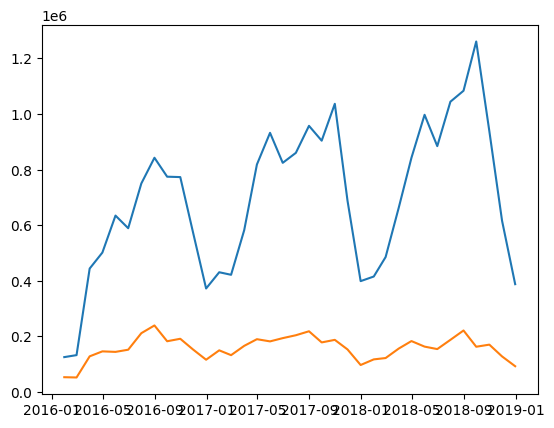

In [ ]:
fig, ax = plt.subplots()

ax.plot(monthly_revenue.index,monthly_revenue["LodgingRevenue"]);
ax.plot(monthly_revenue.index, monthly_revenue["OtherRevenue"]);

### <font color='005377'> Chart Title And Axis Labels </font>

<b>Figure level & chart level Titles:</b><br>
The <font color = "red">set_title()</font> method is used to add the chart title. <br>
The <font color = "red">suptitle()</font> serves as an overall figure title. It can be used to make big headline and then chart title as the sub headline. <br>
for multiple chart figures, it will be at the center top of all the figures
In case of multiple plots, set_title() would create chart title for all individual figures.
<br>

<b>Axis Labels:</b><br>
    The <font color = "red">set_label()</font> method is used to add axis labels. 
<br>

Additional customization for Titles & labels: Fontsize, Color, fontfamily, style


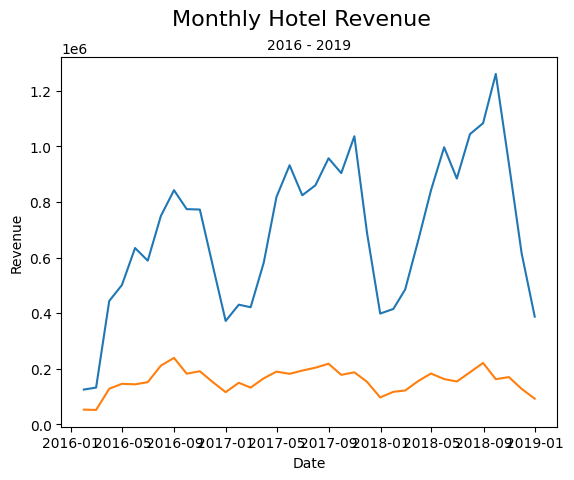

In [ ]:
fig, ax = plt.subplots()

ax.plot(monthly_revenue.index,monthly_revenue["LodgingRevenue"]);
ax.plot(monthly_revenue.index, monthly_revenue["OtherRevenue"]);

fig.suptitle("Monthly Hotel Revenue", fontsize = 16);
ax.set_title("2016 - 2019", fontsize = 10);
ax.set_xlabel("Date", fontsize = 10);
ax.set_ylabel("Revenue", fontsize = 10);


### <font color='005377'> Chart Legends </font>

The <font color = "red">legend() </font> method allow us to add a chart legend to identify each series. 
    - Like other customization functions, legends also have the text formating option like fontsize and color <br> 
    - You need to pass the name of the series in the plot function with the key word <b>label</b> for legend frunction to read it<br>
    - By default the series label are used, but we can pass the custom values as well through an argument in the legend method. <br>
    - We can change the legend location with the loc or "bbox_to_anchor" arguments. loc lets you set a predetermined location option.<br>
    
<br>
<b> Changing the location of legent on the graph</b>

<font color = "Purple">"bbox_to_anchor" </font> lets you specify the <b>(x,y) coordinates</b> to place our legends just where we want. 
<br> Consider the figure to be a square of side 1, and all the coordinates will be in between (0,0) and (1,1) to place the legend inside the chart. <br>
The (x,y) cordinates are the cordinate where the legend box will end (not where it will start)<br>
This method of legend placement needs trial and error. <br> 
Setting coordinates beyond 1 will push the legends outside the chart (useful when there is no whitespace in the chart)
<br>
If you want to display your legends horizontally, you can specidy the <b>ncol</b> value (noumber of columns in the legend box)<br>
You can turn the frame on/off using the <b>frameon = True/False</b>

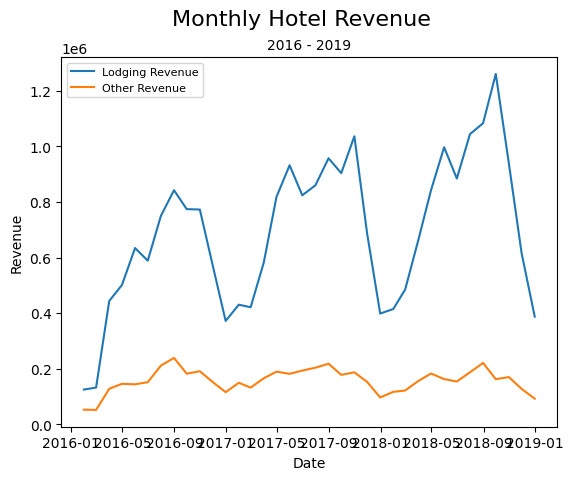

In [ ]:
# using the loc method

fig, ax = plt.subplots()

ax.plot(monthly_revenue.index,monthly_revenue["LodgingRevenue"], label = "Lodging Revenue");
ax.plot(monthly_revenue.index, monthly_revenue["OtherRevenue"], label = "Other Revenue");

fig.suptitle("Monthly Hotel Revenue", fontsize = 16);
ax.set_title("2016 - 2019", fontsize = 10);
ax.set_xlabel("Date", fontsize = 10);
ax.set_ylabel("Revenue", fontsize = 10);

ax.legend(loc = "upper left", fontsize = 8);

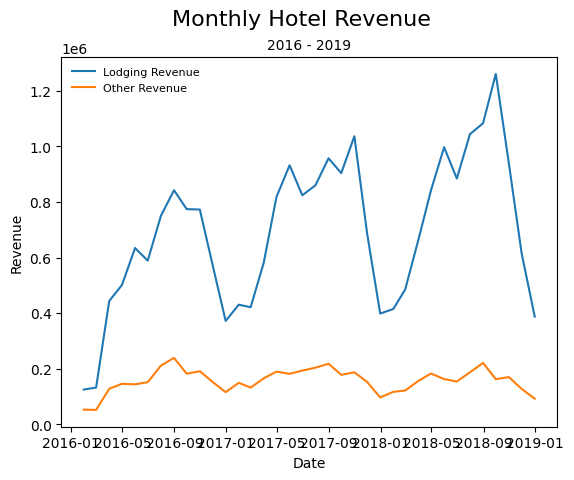

In [ ]:
# using the bbox_to_anchor method

fig, ax = plt.subplots()

ax.plot(monthly_revenue.index,monthly_revenue["LodgingRevenue"], label = "Lodging Revenue");
ax.plot(monthly_revenue.index, monthly_revenue["OtherRevenue"], label = "Other Revenue");

fig.suptitle("Monthly Hotel Revenue", fontsize = 16);
ax.set_title("2016 - 2019", fontsize = 10);
ax.set_xlabel("Date", fontsize = 10);
ax.set_ylabel("Revenue", fontsize = 10);

ax.legend(bbox_to_anchor = (0.3,1), fontsize = 8, frameon = False);

### <font color='005377'>  Line Style </font>

you can change the line style with the 
* linestyle/<b>ls</b> : solid, dashed, dotted, dot-dash 
* linewidth/<b>lw</b> 
* Color



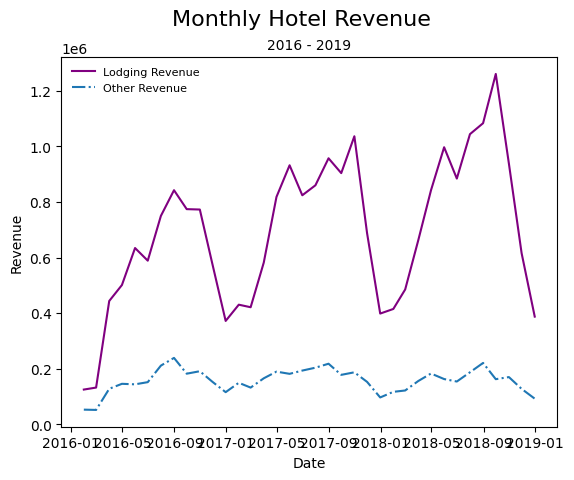

In [ ]:
# Updating the line style

fig, ax = plt.subplots()

ax.plot(monthly_revenue.index,
        monthly_revenue["LodgingRevenue"], 
        label = "Lodging Revenue", 
        lw = 1.5,
        color = "purple");

ax.plot(monthly_revenue.index, 
        monthly_revenue["OtherRevenue"], 
        label = "Other Revenue", 
        ls = "-.");

fig.suptitle("Monthly Hotel Revenue", fontsize = 16);
ax.set_title("2016 - 2019", fontsize = 10);
ax.set_xlabel("Date", fontsize = 10);
ax.set_ylabel("Revenue", fontsize = 10);

ax.legend(bbox_to_anchor = (0.3,1), fontsize = 8, frameon = False);

### <font color='005377'> Axis Limits </font>

<font color = "red">set_lim(lower limit, upper limit)</font> lets you set the axis limit when plotting the numerical data/ Date. 
{set_xlim() for x axis, set_ylim() for y axis} 
<br>

Keeping the base of y-axis at zero highlight the true magnitute of the change across the period and the difference between the series. 

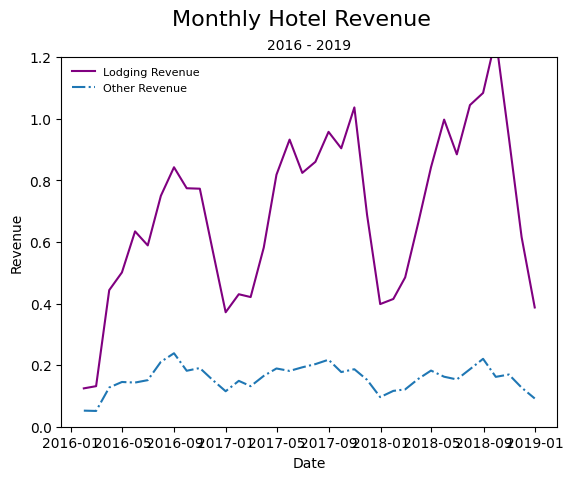

In [ ]:
# Although there is no scope to apply the limit function in this case, 
# I am applying the function to showcase how this function works. 

fig, ax = plt.subplots()

ax.plot(monthly_revenue.index,
        monthly_revenue["LodgingRevenue"]/1000000, 
        label = "Lodging Revenue", 
        lw = 1.5,
        color = "purple");

ax.plot(monthly_revenue.index, 
        monthly_revenue["OtherRevenue"]/1000000, 
        label = "Other Revenue", 
        ls = "-.");

fig.suptitle("Monthly Hotel Revenue", fontsize = 16);
ax.set_title("2016 - 2019", fontsize = 10);
ax.set_xlabel("Date", fontsize = 10);
ax.set_ylabel("Revenue", fontsize = 10);


ax.set_ylim(0,1.2)

ax.legend(bbox_to_anchor = (0.3,1), fontsize = 8, frameon = False);

### <font color='005377'>  Figure size </font>

when we change the figure ssize, the spacing of our chart changes. It increases the space on our chart.
the figsiz argument is passed in the subplots method. 

When you change the figure size, the canvas changes, so it recommended that you plot the chart first and then decide the required figure size and then start with the customization as needed - title and font size

you can adjust the figure size with "figsize" argument. 
figsize = (width, height) - default is 6.4 x 4.8 inches

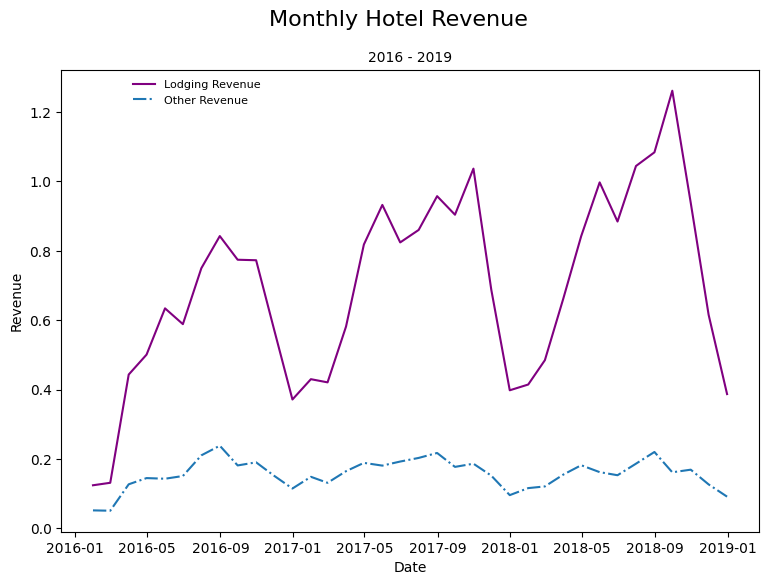

In [ ]:
# Adjusting the figure size

fig, ax = plt.subplots(figsize = (9,6))

ax.plot(monthly_revenue.index,
        monthly_revenue["LodgingRevenue"]/1000000, 
        label = "Lodging Revenue", 
        lw = 1.5,
        color = "purple");

ax.plot(monthly_revenue.index, 
        monthly_revenue["OtherRevenue"]/1000000, 
        label = "Other Revenue", 
        ls = "-.");

fig.suptitle("Monthly Hotel Revenue", fontsize = 16);
ax.set_title("2016 - 2019", fontsize = 10);
ax.set_xlabel("Date", fontsize = 10);
ax.set_ylabel("Revenue", fontsize = 10);

ax.legend(bbox_to_anchor = (0.3,1), fontsize = 8, frameon = False);

If you have noticed - since the white space increased on the chart due to the increase in the figure size, the difference between the figure title and chart title has increased, to avoid this we pass an argument in the <b>fig.suptitle(y = 0.95)</b> to give the revised spacing. Y uses the coordinate system. so y = 1 is the top of the chart. 
using the same method you can also adjust the location for the xlabel and y label. 

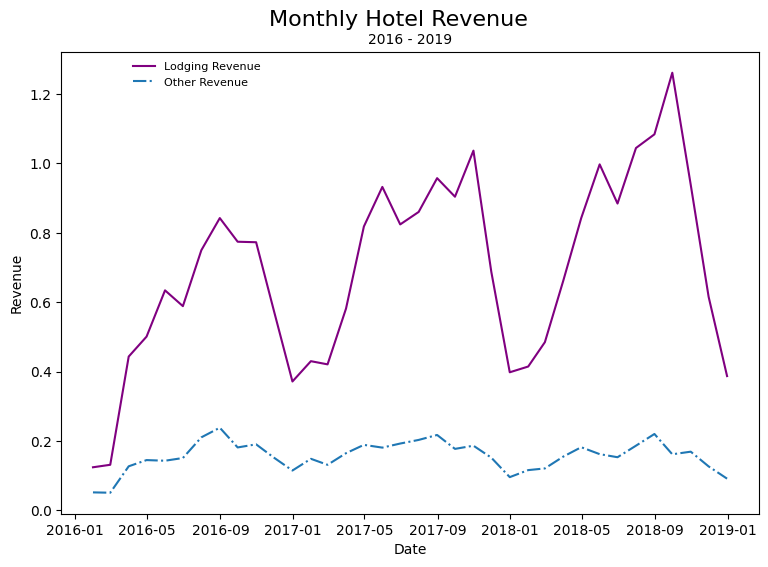

In [ ]:
# Adjusting the space between the figure title and chart title

fig, ax = plt.subplots(figsize = (9,6))

ax.plot(monthly_revenue.index,
        monthly_revenue["LodgingRevenue"]/1000000, 
        label = "Lodging Revenue", 
        lw = 1.5,
        color = "purple");

ax.plot(monthly_revenue.index, 
        monthly_revenue["OtherRevenue"]/1000000, 
        label = "Other Revenue", 
        ls = "-.");

fig.suptitle("Monthly Hotel Revenue", fontsize = 16, y = 0.95);

ax.set_title("2016 - 2019", fontsize = 10);

ax.set_xlabel("Date", fontsize = 10);
ax.set_ylabel("Revenue", fontsize = 10);

ax.legend(bbox_to_anchor = (0.3,1), fontsize = 8, frameon = False);

### <font color='005377'>  Axis Ticks </font>

Matplotlib automatically sets the values and location of the markers(points) of the x and y axis, however, it is possible to set the markers and the location manually.<br>
The <font color = "red" >set_ticks(iterable)</font> method function is used to apply the custom x-ticks and y-ticks. 

<br>
you can also use pyplot ticks() method for the customization of the ticks such as rotation, color and size. 
<br>

<b>Note:</b> set_xticklabels() and set_yticklabels() functions are used to set tick labels. However now you can skip using them and instead pass the label parameters directly in the set_ticks() function


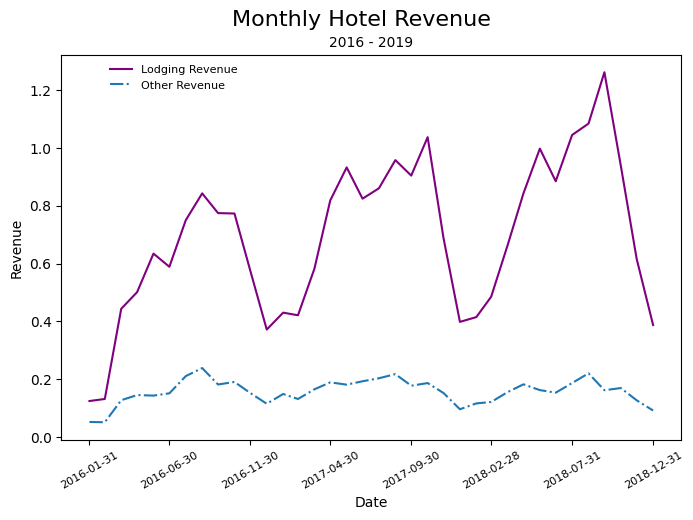

In [ ]:
# Adjusting the x-ticks

fig, ax = plt.subplots(figsize = (8,5)) 

ax.plot(monthly_revenue.index,
        monthly_revenue["LodgingRevenue"]/1000000, 
        label = "Lodging Revenue", 
        lw = 1.5,
        color = "purple");

ax.plot(monthly_revenue.index, 
        monthly_revenue["OtherRevenue"]/1000000, 
        label = "Other Revenue", 
        ls = "-.");

fig.suptitle("Monthly Hotel Revenue", fontsize = 16, y = 0.97);

ax.set_title("2016 - 2019", fontsize = 10);

ax.set_xlabel("Date", fontsize = 10);
ax.set_ylabel("Revenue", fontsize = 10);


ax.set_xticks(monthly_revenue.index[::5])
plt.xticks(rotation = 30, fontsize = 8)

ax.legend(bbox_to_anchor = (0.3,1), fontsize = 8, frameon = False);

###  <font color='005377'> Vertical Lines </font>

<font color = "red">axvline()</font> function is used to mark the vertical lines<br>
    - You have to specify the x point, line style and color<br>
    - You can also add it in the legend using label argument. <br>
    - You can use the y coordinage (ymin, ymax) argument to change the size of the vertical line<br>

You use vertical lines to mark key points  

In [ ]:
monthly_revenue[monthly_revenue["LodgingRevenue"] == monthly_revenue["LodgingRevenue"].max()]

,LodgingRevenue,OtherRevenue
date,,
2018-09-30,1261185.22,161924.47


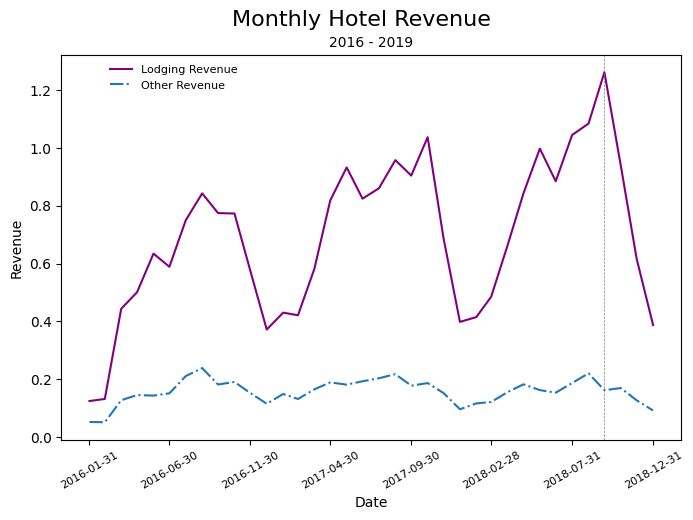

In [ ]:
# Adjusting the x-ticks, on the date for the maximun Lodging revenue.

fig, ax = plt.subplots(figsize = (8,5)) 

ax.plot(monthly_revenue.index,
        monthly_revenue["LodgingRevenue"]/1000000, 
        label = "Lodging Revenue", 
        lw = 1.5,
        color = "purple");

ax.plot(monthly_revenue.index, 
        monthly_revenue["OtherRevenue"]/1000000, 
        label = "Other Revenue", 
        ls = "-.");

fig.suptitle("Monthly Hotel Revenue", fontsize = 16, y = 0.97);

ax.set_title("2016 - 2019", fontsize = 10);

ax.set_xlabel("Date", fontsize = 10);
ax.set_ylabel("Revenue", fontsize = 10);


ax.set_xticks(monthly_revenue.index[::5])
plt.xticks(rotation = 30, fontsize = 8)

ax.axvline(x = 17804, ls = "--",lw = 0.5, c = "grey") 

ax.legend(bbox_to_anchor = (0.3,1), fontsize = 8, frameon = False);

### <font color='005377'> Adding text </font>

The <font color = "red">ax.text()</font> method is used to add other relevant text at a specific cordinate <br>
ax.text(x, y, string, additional text information):x and y should be on the scale of the x & y <br>

The position to place the text. By default, this is in data coordinates. The coordinate system can be changed using the transform parameter <br>

You can also have the figure level text, which you can place outside the chart, but in the figure. It is to give some extra idea about the chart.


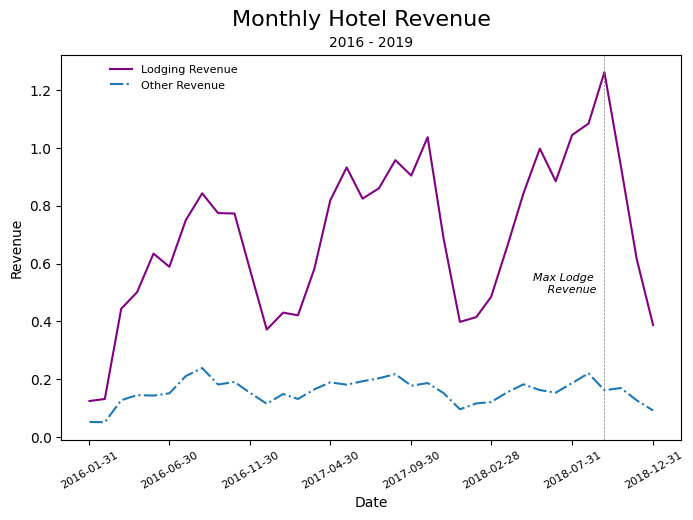

In [ ]:
# Adjusting the x-ticks, on the date for the maximun Lodging revenue.

fig, ax = plt.subplots(figsize = (8,5)) 

ax.plot(monthly_revenue.index,
        monthly_revenue["LodgingRevenue"]/1000000, 
        label = "Lodging Revenue", 
        lw = 1.5,
        color = "purple");

ax.plot(monthly_revenue.index, 
        monthly_revenue["OtherRevenue"]/1000000, 
        label = "Other Revenue", 
        ls = "-.");

fig.suptitle("Monthly Hotel Revenue", fontsize = 16, y = 0.97);

ax.set_title("2016 - 2019", fontsize = 10);

ax.set_xlabel("Date", fontsize = 10);
ax.set_ylabel("Revenue", fontsize = 10);


ax.set_xticks(monthly_revenue.index[::5])
plt.xticks(rotation = 30, fontsize = 8)

ax.axvline(x = 17804, ls = "--",lw = 0.5, c = "grey") 
ax.text(17790, 0.5, "Max Lodge \n Revenue", fontstyle = "italic", size = 8, ha = "right")


ax.legend(bbox_to_anchor = (0.3,1), fontsize = 8, frameon = False);

### <font color='005377'> Text Annotation </font>

Annotations are great to call out and label important datapoints. <br>
<font color = "red">ax.annotate</font>(string, datapoint cordinate, text cordinate, arrow style, text formatting)


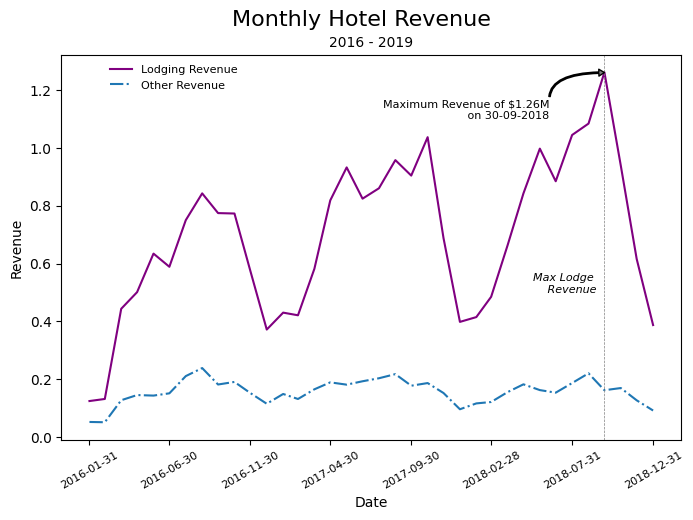

In [ ]:
# Text annotation
fig, ax = plt.subplots(figsize = (8,5)) 

ax.plot(monthly_revenue.index,
        monthly_revenue["LodgingRevenue"]/1000000, 
        label = "Lodging Revenue", 
        lw = 1.5,
        color = "purple");

ax.plot(monthly_revenue.index, 
        monthly_revenue["OtherRevenue"]/1000000, 
        label = "Other Revenue", 
        ls = "-.");

fig.suptitle("Monthly Hotel Revenue", fontsize = 16, y = 0.97);

ax.set_title("2016 - 2019", fontsize = 10);

ax.set_xlabel("Date", fontsize = 10);
ax.set_ylabel("Revenue", fontsize = 10);


ax.set_xticks(monthly_revenue.index[::5])
plt.xticks(rotation = 30, fontsize = 8)

ax.axvline(x = 17804, ls = "--",lw = 0.5, c = "grey") 
ax.text(17790, 0.5, "Max Lodge \n Revenue", fontstyle = "italic", size = 8, ha = "right")

ax.annotate("Maximum Revenue of $1.26M\n on 30-09-2018", 
            xy = (17804, 1.26), 
            xytext = (17700, 1.1), 
            size = 8, 
            ha = "right", 
            arrowprops = dict(facecolor= "grey",
                              width=1, 
                              headwidth= 5, 
                              headlength= 4,
                              connectionstyle = "angle3,angleA=90,angleB=0"
                
            ))


ax.legend(bbox_to_anchor = (0.3,1), fontsize = 8, frameon = False);

### <font color='005377'> Removing Borders </font>

You can remove specific chart borders with <font color = "red">ax.spines[borders].set_visible(False)</font>

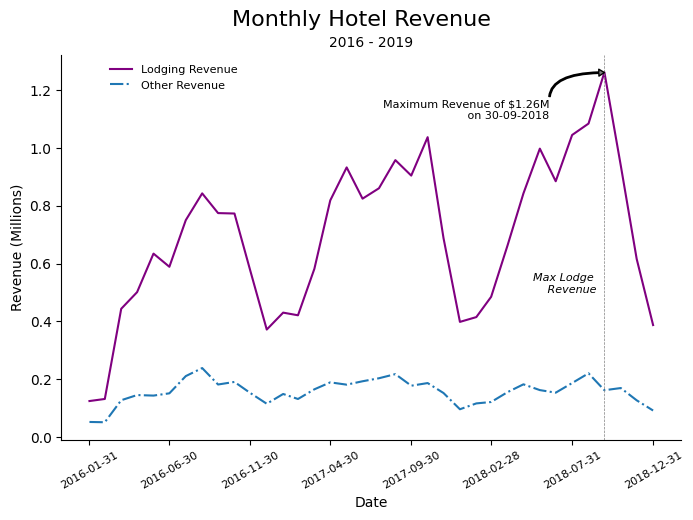

In [ ]:
# Removing Borders
fig, ax = plt.subplots(figsize = (8,5)) 

ax.plot(monthly_revenue.index,
        monthly_revenue["LodgingRevenue"]/1000000, 
        label = "Lodging Revenue", 
        lw = 1.5,
        color = "purple");

ax.plot(monthly_revenue.index, 
        monthly_revenue["OtherRevenue"]/1000000, 
        label = "Other Revenue", 
        ls = "-.");

fig.suptitle("Monthly Hotel Revenue", fontsize = 16, y = 0.97);

ax.set_title("2016 - 2019", fontsize = 10);

ax.set_xlabel("Date", fontsize = 10);
ax.set_ylabel("Revenue (Millions)", fontsize = 10);


ax.set_xticks(monthly_revenue.index[::5])
plt.xticks(rotation = 30, fontsize = 8)

ax.axvline(x = 17804, ls = "--",lw = 0.5, c = "grey") 
ax.text(17790, 0.5, "Max Lodge \n Revenue", fontstyle = "italic", size = 8, ha = "right")

ax.annotate("Maximum Revenue of $1.26M\n on 30-09-2018", 
            xy = (17804, 1.26), 
            xytext = (17700, 1.1), 
            size = 8, 
            ha = "right", 
            arrowprops = dict(facecolor= "grey",
                              width=1, 
                              headwidth= 5, 
                              headlength= 4,
                              connectionstyle = "angle3,angleA=90,angleB=0"
                
            ))


ax.spines[["right", "top"]].set_visible(False)


ax.legend(bbox_to_anchor = (0.3,1), fontsize = 8, frameon = False);